# Glitch model for GWTC-2.1 events
## https://dcc.ligo.org/LIGO-T2100218

<pre>
Glitch model for events in GWTC_2.1 that used BayesWave glitch subtraction. This includes L1 data for the following events:
* GW190413_052954
* GW190425_081805
* GW190503_185404
* GW190513_205428
* GW190514_065416
* GW190701_203306
* GW190924_021846

Each data file contains three channels:
1) the calibrated strain data, including any glitches that are present
2) a model of the glitches, produced using the BayesWave algorithm
3) the calibrated data with the glitch model subtracted, used for parameter estimation

For the L1 data for all events, these channels have the following names and sample rates:
1) L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01 16384
2) L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_glitch 16384
3) L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_T1700406_v4 16384
</pre>

In [1]:
from  gwpy.timeseries import TimeSeriesDict
import matplotlib 
%matplotlib inline

In [2]:
# channel and file information for event S190924h
channels = ['L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01',
            'L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_glitch',
            'L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_T1700406_v4']
data_dict = TimeSeriesDict.read('L-L1_HOFT_CLEAN_SUB60HZ_C01_T1700406_v4-1253322752-4096.gwf',channels)


In [3]:
print(data_dict['L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01'])


TimeSeries([-1.88303646e-20, -3.32529443e-20, -2.22311255e-20,
            ...,  4.23460400e-19,  4.29316264e-19,
             4.36356455e-19]
           unit: dimensionless,
           t0: 1253322752.0 s,
           dt: 6.103515625e-05 s,
           name: L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01,
           channel: L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01)


In [4]:
# crop the data around the glitch (make a copy)
gps_glitch = 1253326740.85
data_dict_cropped = data_dict.copy().crop(gps_glitch-0.2,gps_glitch+0.2)

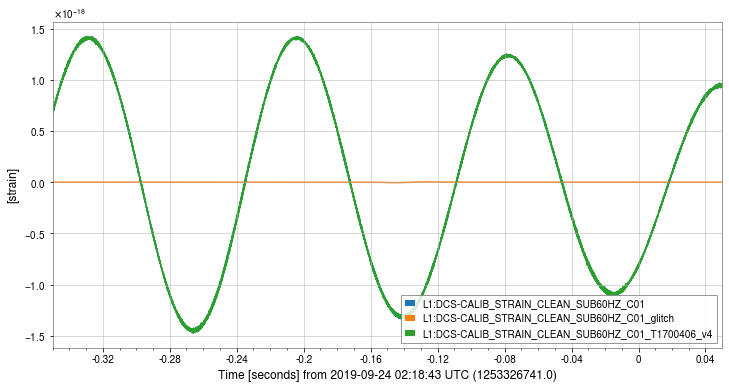

In [5]:
# plot all data in the frame file
plot = data_dict_cropped.plot()
ax = plot.gca()
ax.legend()
ax.set_ylabel('[strain]')
plot.show()

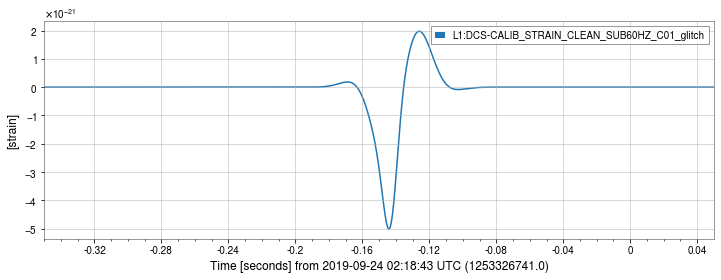

In [6]:
# the y-scale is too large to see the glitch model,
# and the green deglitched data lie right on top of the blue original data.

# plot only the glitch model 
plot = data_dict_cropped['L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_glitch'].plot(label='L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_glitch')
ax = plot.gca()
ax.legend()
ax.set_ylabel('[strain]')
plot.show()

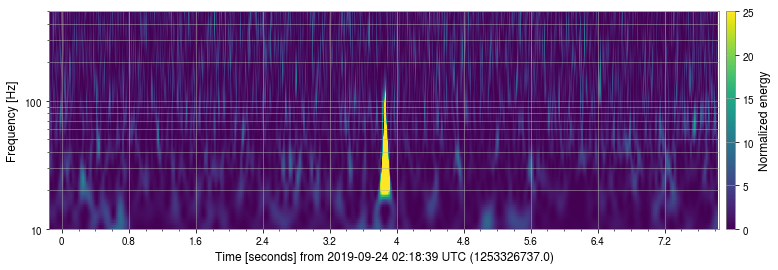

In [7]:
# plot a spectrogram the original data using the q-transform
qscan = data_dict['L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01']\
                    .crop(gps_glitch-32,gps_glitch+32)\
                    .q_transform(outseg=(gps_glitch-4, gps_glitch+4))

plot = qscan.plot(figsize=(12,4))
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(10, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy',vmin=0,vmax=25)
plot.show()

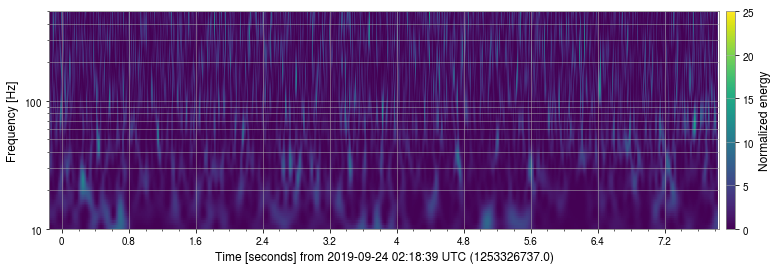

In [8]:
# plot a spectrogram of the data with the glitch subtracted using the q-transform
qscan = data_dict['L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01_T1700406_v4']\
                    .crop(gps_glitch-32,gps_glitch+32)\
                    .q_transform(outseg=(gps_glitch-4, gps_glitch+4))

plot = qscan.plot(figsize=(12,4))
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(10, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy',vmin=0,vmax=25)
plot.show()